In [19]:
import tszpower as tsz
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Initialize

In [20]:
# 1) Define parameters
allpars = {
    'omega_b': 0.049*0.68**2,
    'omega_cdm': 0.261*0.68**2,
    'H0': 68.0,
    'tau_reio': 0.0544,
    'ln10^{10}A_s': 3.035173309489548,
    'n_s': 0.965,
    'M_min': 1e14*0.68,
    'M_max': 1e16*0.68,
    # 'ell_min': 2,
    # 'ell_max': 8000,
    # 'dlogell': 0.1,
    'z_min': 1e-2,
    'z_max': 3.0,
    'P0GNFW': 8.130,
    'c500': 1.156,
    'gammaGNFW': 0.3292,
    'alphaGNFW': 1.0620,
    'betaGNFW': 5.4807,
    'B': 1.4,
    "cosmo_model": 0, # use mnu-lcdm emulators
    'jax': 1
}
tsz.classy_sz.set(allpars)
tsz.initialise()

/var/folders/pk/xl4598515pb7q2jfw1tdzyr00000gn/T/ipykernel_83502/3314020690.py:26: DeprecationWarning: compute_class_szfast is deprecated. Use initialize_classy_szfast instead.
  tsz.initialise()


In [21]:
tsz.classy_sz.get_sigma8_and_der(params_values_dict=allpars)

Array([1.04367225e+00, 8.10000000e-01, 2.45510726e-01, 7.64263083e+00,
       3.04599791e+00, 2.80236068e+02, 1.08855422e+03, 1.44130040e+02,
       1.38098476e+04, 2.80946561e+02, 1.08486521e+03, 1.44451472e+02,
       1.38090482e+04, 1.46598318e+02], dtype=float64)

# Compute $D_{\ell}^{yy}$

In [22]:
ell = tsz.get_ell_range()
D_ell_yy = tsz.compute_Dell_yy(params_value_dict=allpars)
# %timeit -n 10 -r 5 D_ell_yy, sigma_full, sigma_gauss = tsz.compute_Dell_yy_with_error(params_value_dict=allpars)

In [23]:
%timeit -n 10 -r 5 D_ell_yy = tsz.compute_Dell_yy(params_value_dict=allpars)

127 ms ± 12.1 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
/var/folders/pk/xl4598515pb7q2jfw1tdzyr00000gn/T/ipykernel_83502/4108974336.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('$\ell$')
/var/folders/pk/xl4598515pb7q2jfw1tdzyr00000gn/T/ipykernel_83502/4108974336.py:5: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('$D_\ell^{yy}$')


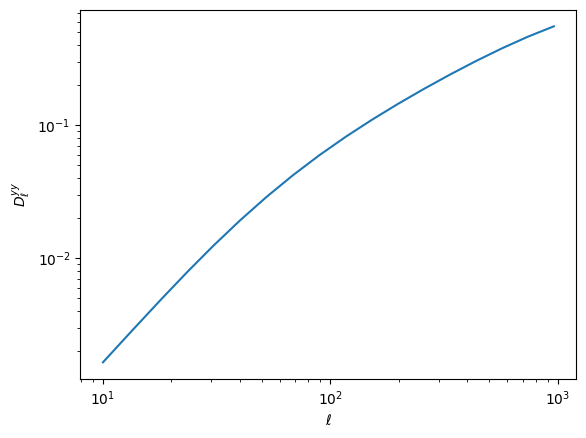

In [24]:
plt.plot(ell, D_ell_yy)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$D_\ell^{yy}$')
plt.show()  

# Compute $D_{\ell}^{yy}$ with error bars

In [25]:
D_ell_yy, sigma_full, sigma_gauss = tsz.compute_Dell_yy_with_error(params_value_dict=allpars)

In [26]:
%timeit -n 10 -r 5 D_ell_yy, sigma_full, sigma_gauss = tsz.compute_Dell_yy_with_error(params_value_dict=allpars)

276 ms ± 6.04 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
/var/folders/pk/xl4598515pb7q2jfw1tdzyr00000gn/T/ipykernel_83502/2100274058.py:5: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('$\ell$')
/var/folders/pk/xl4598515pb7q2jfw1tdzyr00000gn/T/ipykernel_83502/2100274058.py:6: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('$D_\ell^{yy}$')


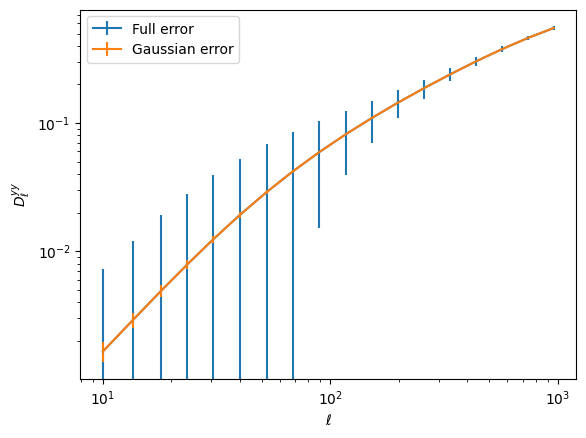

In [27]:
plt.errorbar(ell, D_ell_yy, yerr=sigma_full, fmt='-', label='Full error')
plt.errorbar(ell, D_ell_yy, yerr=sigma_gauss, fmt='-', label='Gaussian error')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$D_\ell^{yy}$')
plt.legend()
plt.show()

# Trispectrum

In [31]:
tllp_raw = tsz.compute_trispectrum(params_values_dict=allpars)
tllp_scaled = tsz.compute_scaled_trispectrum(params_value_dict=allpars)

In [34]:
%timeit -n 10 -r 5 tllp_scaled = tsz.compute_scaled_trispectrum(params_value_dict=allpars)

135 ms ± 21.6 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


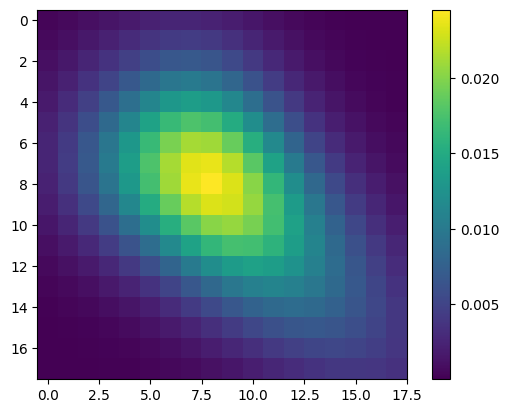

In [33]:
plt.imshow(tllp_scaled)
plt.colorbar()
plt.show()